# Passenger Satisfaction Predictor

Classifying customers who are satisified and dissatisfied with the services of a company is very helpful in devleoping focused marketing and user retention strategies.

In a sector like air travel where there are structured rewards programs for customer retention, such classifications gain increased signifcance.

Here we are trying to build a model for classifying satisfied and dissatisfied customers of an airline company.

Importing basic packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Importing the dataset

Importing the dataset for training stored locally

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Checking the shape of the dataframe

In [4]:
print("The dataframe has", df.shape[0], "rows and", df.shape[1], 'colums')

The dataframe has 103904 rows and 25 colums


## 2. Data Cleaning

Let's see the data types of the columns and also check for missing data.

In [5]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

We see that the features are of the expected datatypes.  One anomaly is that Departure delay is stored as int, but Arrival delay is a float. The reason might be that there are missing values in the Arrival delay feature. We will check that. 

Before going forward, let's drop the 'Unnamed: 0' column which is an index for the row and the 'id' column which is not useful for our analysis.

In [6]:
df.drop(columns = {'Unnamed: 0', 'id'}, inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Checking for null values

In [7]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

We see that, there are 310 missing values in arrival delay feature. Let's check a few of those rows.

In [8]:
df[df['Arrival Delay in Minutes'].isnull()]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


The number of customers with a missing value is very small (around 0.3%), so let's drop those rows. Before we do that, let's just do a check whether there is any specific pattern for the customers with missing values with respect to our traget variable.

In [9]:
df[df['Arrival Delay in Minutes'].isnull()].groupby('satisfaction').mean()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,36.780220,1029.82967,2.362637,3.142857,2.450549,2.846154,2.857143,2.587912,2.785714,2.912088,2.972527,2.895604,3.467033,2.950549,3.324176,2.873626,39.664835,NaN
satisfied,42.460938,1516.09375,3.195312,3.117188,3.125000,3.046875,3.695312,4.093750,4.070312,3.843750,3.765625,3.718750,3.984375,3.781250,3.820312,3.835938,34.257812,NaN


In [10]:
df[df['Arrival Delay in Minutes'].isnull() == False].groupby('satisfaction').mean()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,37.569126,928.607084,2.399748,3.129070,2.547149,2.976524,2.958362,2.656337,3.037072,2.894100,3.019303,2.991107,3.375709,3.043239,3.389015,2.936317,16.431913,17.127536
satisfied,41.748558,1530.180302,3.161191,2.969887,3.031316,2.977682,3.520814,4.027285,3.966234,3.965276,3.857585,3.822438,3.966345,3.645656,3.969887,3.744081,12.546362,12.630799


Seems that the missing values are at random. Let's go ahead and drop the rows with missing values.

In [11]:
df = df[df['Arrival Delay in Minutes'].isnull() == False]

In [12]:
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].astype(int)

df.shape

(103594, 23)

Before proceeding, let's transform our target feature satisfaction into an int type feature with '1' for satisfied and '0' for neutral or dissatisfied.

In [13]:
df.replace({'satisfaction':{'satisfied':1, 'neutral or dissatisfied':0}}, inplace = True)

In [14]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0,1


## 3. Exploratory Data Analysis

First let's see the number of unique values in each feature.

In [15]:
df.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3802
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            445
Arrival Delay in Minutes              455
satisfaction                            2
dtype: int64

**Points to Note**

* Gender, Customer Type and Type of Travel are binary valued features, while Class has 3 categories.
* Age, Flight Distance, and the Delay features are continouus valued.
* The remaining features are ratings from 0-5 (hence having 6 unique values) One discrepancy there is the Baggage handling feature with just 5 values. May be, none of the customers gave a specific rating value (it must be either 0 or 5). Let's just check.

In [16]:
df['Baggage handling'].unique()

array([4, 3, 5, 1, 2])

As you can see, none of the customers have rated 0 for baggage handling.

Let's start analysing our dataset in detail. At first, let's see how our target variable is distributed.

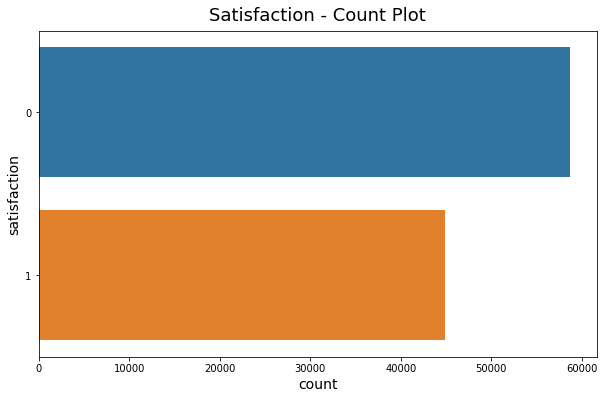

In [17]:
plt.figure(figsize = (10,6))
plt.title('Satisfaction - Count Plot', fontsize = 18, pad=10)
plt.xlabel('', fontsize = 14)
plt.ylabel('', fontsize = 14)
sns.countplot(y="satisfaction",  data=df, orient='h')

In [18]:
print('The percentage of satisfied customers in the dataset is', df['satisfaction'].mean()*100)

The percentage of satisfied customers in the dataset is 43.339382589725275


Although not perfectly balanced, the dataset seems pretty good. Let's proceed with the original dataset for our modelling after we complete our exploratory analysis.

### 3.1 Analysing Age, and Flight Distance, Arrival and Departure Delays

We will define a function to generate the required plots.

In [19]:
def plot_num(feature, bins, labels):
    
    plt.figure(figsize = (15,8))
    barWidth = 0.3

    # set height of bar
    bars1 = df[df['satisfaction']==1][feature].value_counts(bins = bins, sort = False)
    bars2 = df[df['satisfaction']==0][feature].value_counts(bins = bins, sort = False)

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, bars1, color='c', width=barWidth, edgecolor='white', label='Satisfied')
    plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='Not Satisfied')

    # Add xticks on the middle of the group bars
    plt.xlabel(feature, fontsize=16)
    plt.xticks([r - 0.5* barWidth + barWidth for r in range(len(bars1))], labels)

    plt.title(f'Satisfaction vs {feature}', fontsize = 20, pad = 10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Count', fontsize=16)

    # Create legend & Show graphic
    plt.legend(prop={'size': 12})
    plt.show()

### Age

First let's check how age is distributed so that we can create the appropriate bins.

The maximum and minimum values in 'Age' are 85 and 7


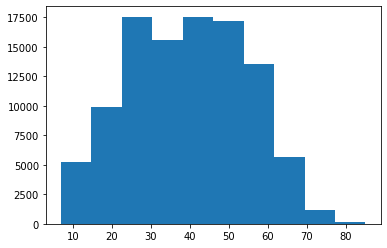

In [20]:
def dist(feature):
    plt.hist(df[feature])
    num1 = df[feature].max()
    num2 = df[feature].min()
    print(f'The maximum and minimum values in \'{feature}\' are {num1} and {num2}')
    
dist('Age')

The ages are distributed from 7 to 85 and the count decreses rapidly above 70. Let's use the following bins -> 0-20, 20-40, 40-60, >60

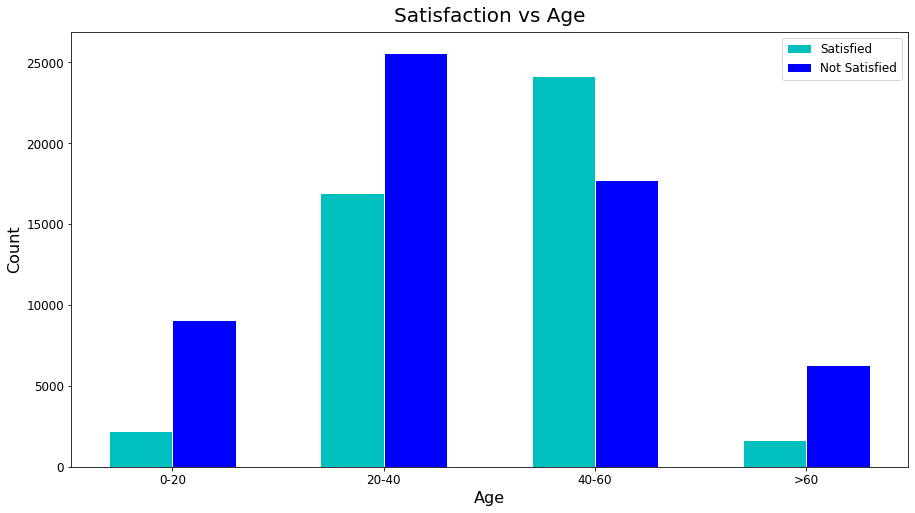

In [21]:
bins_age = [0,20,40,60,100]
labels_age = ['0-20', '20-40', '40-60', '>60']

plot_num('Age',bins_age,labels_age)

### Flight distance

The maximum and minimum values in 'Flight Distance' are 4983 and 31


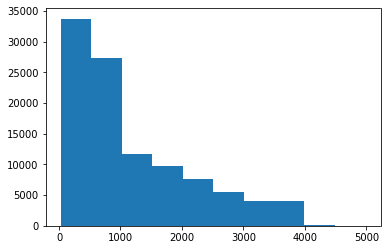

In [22]:
dist('Flight Distance')

Let's use the following bins -> 0-500, 500-1000, 1000-2000, 2000-3000, >3000

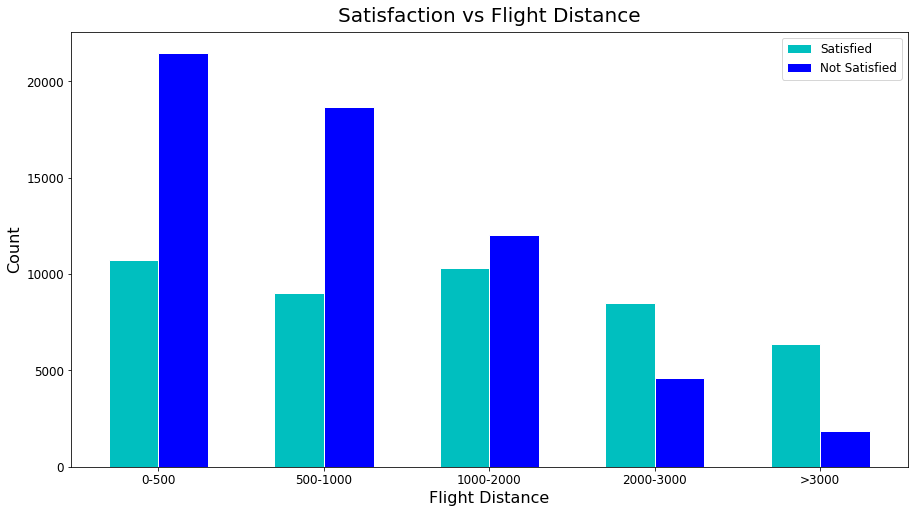

In [23]:
bins_fd = [0,500,1000,2000,3000,5000]
labels_fd = ['0-500', '500-1000', '1000-2000', '2000-3000', '>3000']

plot_num('Flight Distance',bins_fd,labels_fd)

### Departure Delay in Minutes

The maximum and minimum values in 'Departure Delay in Minutes' are 1592 and 0


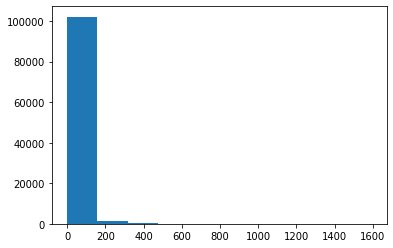

In [24]:
dist('Departure Delay in Minutes')

Most of the delays are very low and less than 100.

Let's use the following bins -> 0-10, 10-20,20-30, 30-60, 60-90, 90-120, >120

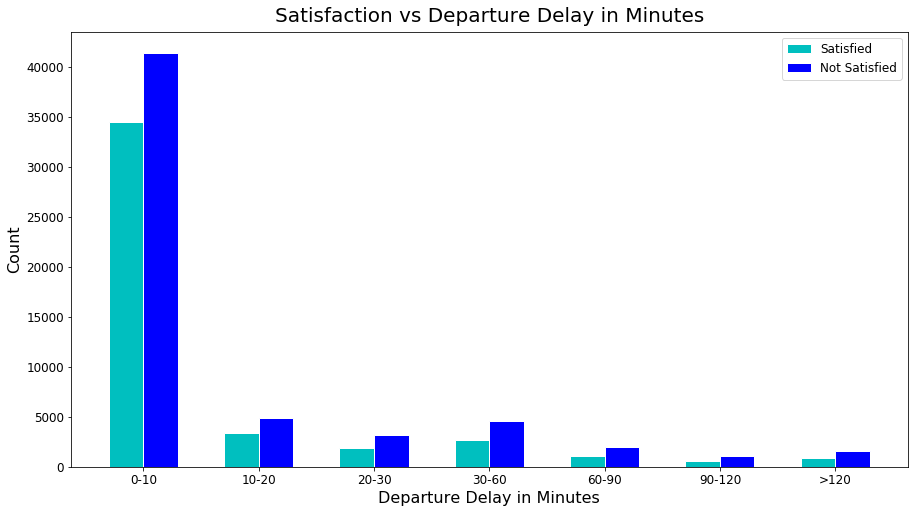

In [25]:
bins_dd = [0,10,20,30,60,90,120,1600]
labels_dd = ['0-10','10-20','20-30', '30-60', '60-90', '90-120', '>120']

plot_num('Departure Delay in Minutes',bins_dd,labels_dd)

### Arrival Delay in Minutes

The maximum and minimum values in 'Arrival Delay in Minutes' are 1584 and 0


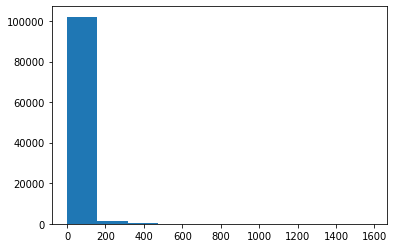

In [26]:
dist('Arrival Delay in Minutes')

The distribution seems similar to that departure delay. Let's use the same bins.

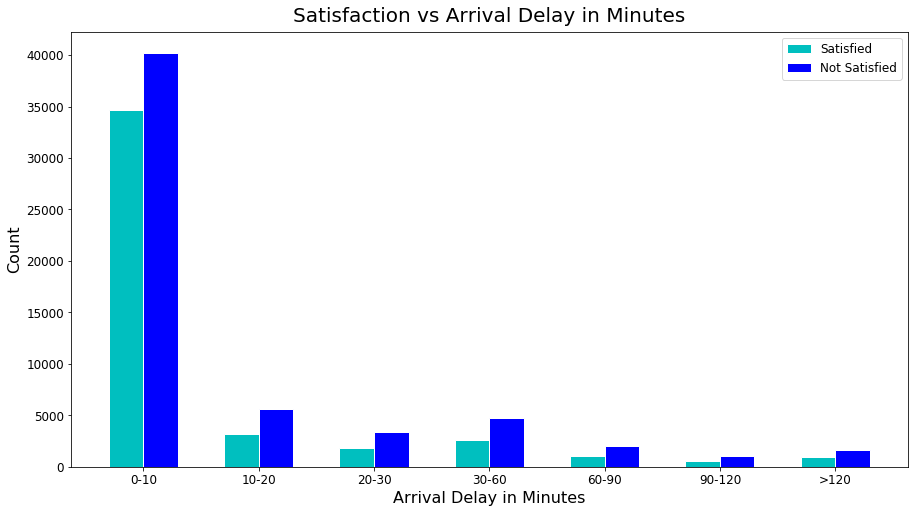

In [27]:
bins_ad = [0,10,20,30,60,90,120,1600]
labels_ad = ['0-10','10-20','20-30', '30-60', '60-90', '90-120', '>120']

plot_num('Arrival Delay in Minutes',bins_ad,labels_ad)

### 3.2 Analysing Gender, Customer Type, Type of Travel, Class

These features have either 2 or 3 categories. We will first define a function to generate the required plots to analyse each feature.

In [28]:
#function to create the required plots
def analyse(feature):
    
    #temp dataframe for creating the mean-plot
    temp = df[['satisfaction', feature]].groupby(feature).mean()
    temp.reset_index(inplace = True)
    
    #subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))
    title = 'Analysing the \'' + feature + '\' feature'
    title1 = feature + ' vs Satisfaction'
    title2 = feature + ' - Count Plot'
    
    #setting titles and labels
    fig.suptitle(title, fontsize=22)
    ax1.set_title(title1, fontsize = 18, pad=10)
    ax1.set_xlabel('', fontsize = 16)
    ax1.set_ylabel('', fontsize = 16)
    ax2.set_title(title2, fontsize = 18, pad=10)
    ax2.set_xlabel('', fontsize = 16)
    ax2.set_ylabel('', fontsize = 16)
    
    #plotting using seaborn
    order = temp[temp.columns[0]].unique()
    sns.barplot(x = temp.columns[0], y = temp.columns[1], data = temp, ax = ax1, order = order)
    sns.countplot(y=feature,  data=df, ax = ax2, order = order)
    
    #adjusting the bar widths and heights
    for p in ax1.patches:
        w = p.get_width()
        p.set_width(0.4)
        p.set_x(p.get_x() + (w-0.4)/2) 
    for p in ax2.patches:
        h = p.get_height()
        p.set_height(0.4)
        p.set_y(p.get_y() + (h-0.4)/2) 
    
    plt.show()

### Gender

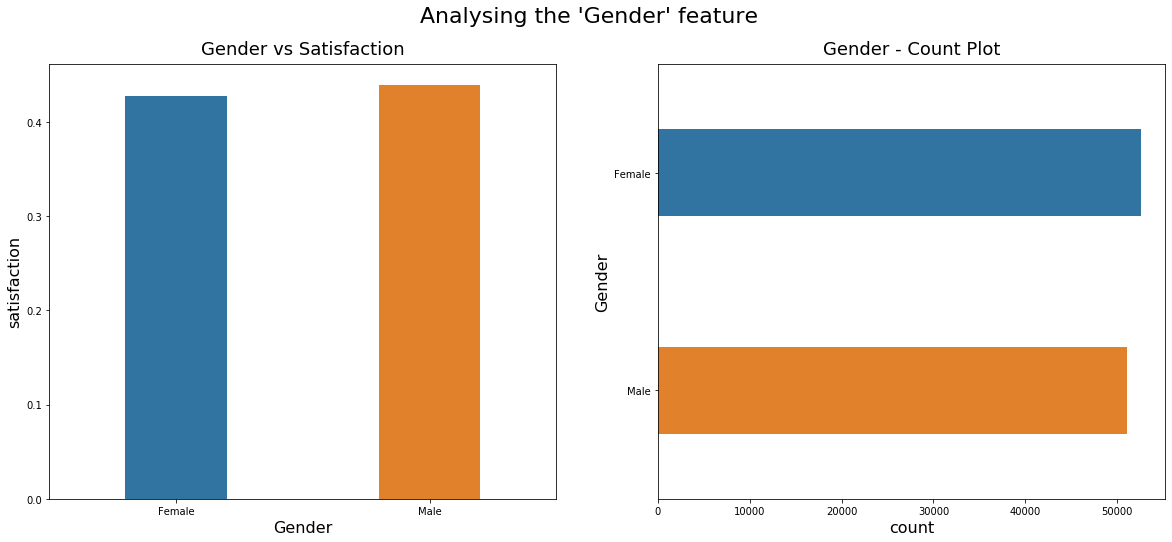

In [29]:
analyse('Gender')

### Customer Type

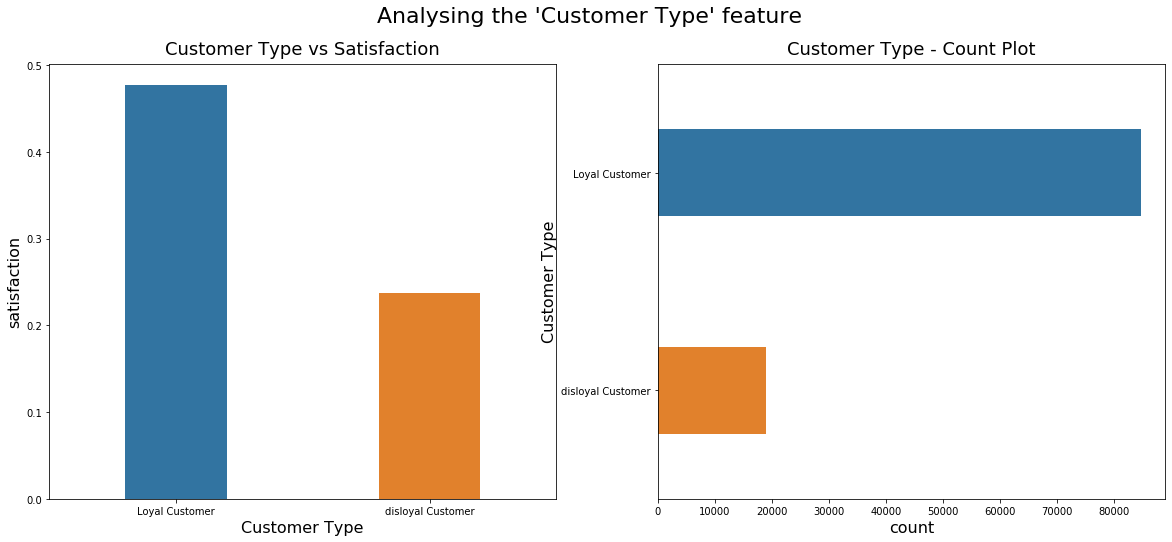

In [30]:
analyse('Customer Type')

### Type of Travel

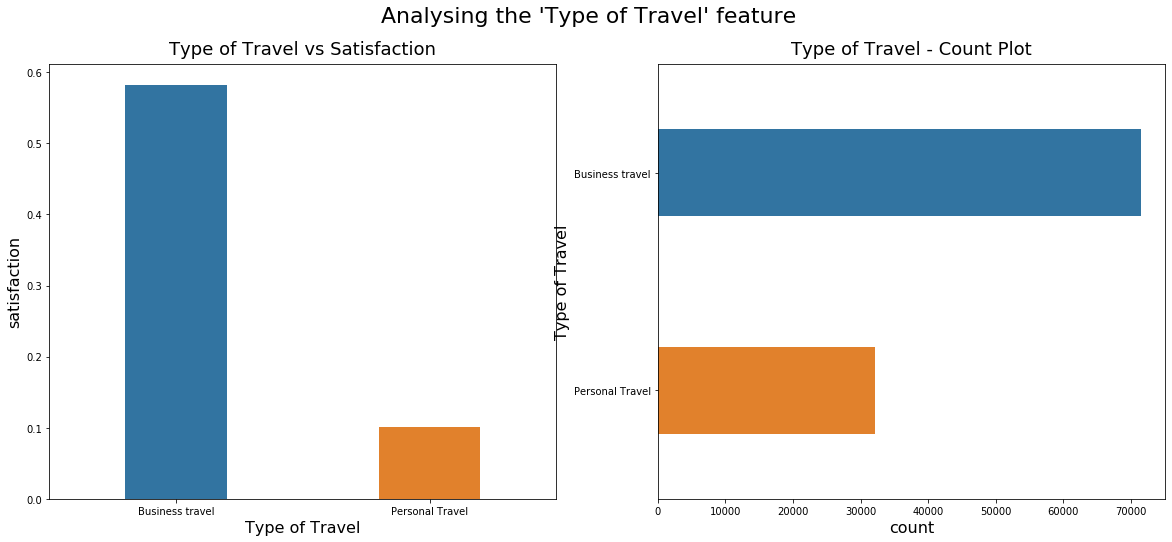

In [31]:
analyse('Type of Travel')

### Class

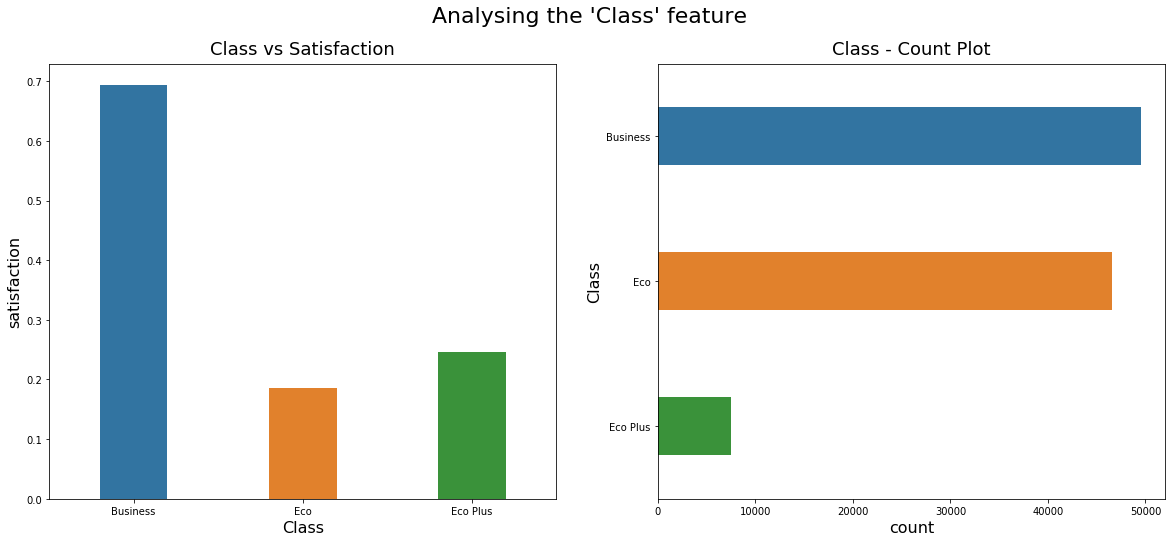

In [32]:
analyse('Class')

### 3.3 Analysing the rating features

In [33]:
rating = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction']

In [34]:
rating_df = df[rating].groupby('satisfaction').mean()

In [35]:
rating_df

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
satisfaction,,,,,,,,,,,,,,
0,2.399748,3.129070,2.547149,2.976524,2.958362,2.656337,3.037072,2.894100,3.019303,2.991107,3.375709,3.043239,3.389015,2.936317
1,3.161191,2.969887,3.031316,2.977682,3.520814,4.027285,3.966234,3.965276,3.857585,3.822438,3.966345,3.645656,3.969887,3.744081


Now let's define a function to plot the ratings

In [36]:
def plot_rating(features, diff = None):
    
    plt.figure(figsize = (20,12))
    barWidth = 0.3

    rating_df = df[features].groupby('satisfaction').mean()

    if diff != None:
        new_columns = [] 
        for column in rating_df.columns:
            if (rating_df.loc[1, column] - rating_df.loc[0, column]) > diff:
                new_columns.append(column)
        rating_df = rating_df[new_columns]

    
    # set height of bar
    bars1 = rating_df.iloc[0,:]
    bars2 = rating_df.iloc[1,:]

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, bars1, color='c', width=barWidth, edgecolor='white', label='Not Satisfied')
    plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='Satisfied')

    # Add xticks on the middle of the group bars
    labels = features
    plt.xlabel('Rating Index', fontsize=16)
    plt.xticks([r - 0.5* barWidth + barWidth for r in range(len(bars1))], labels)

    plt.title(f'Satisfaction vs Indexes', fontsize = 20, pad = 10)
    plt.xticks(fontsize=12, rotation='vertical')
    plt.yticks(fontsize=12)
    plt.ylabel('Average Rating out of 5', fontsize=16)

    # Create legend & Show graphic
    plt.legend(prop={'size': 12})
    plt.show()

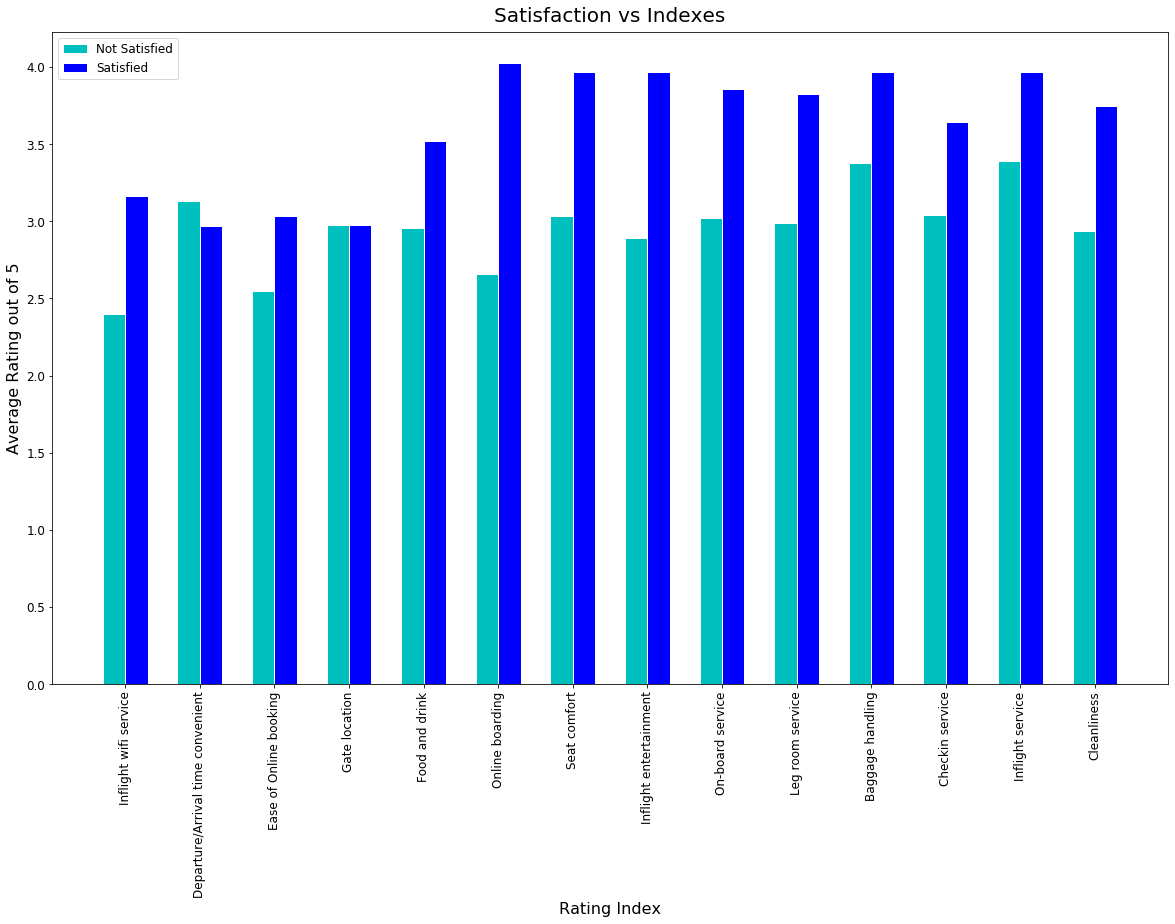

In [37]:
plot_rating(rating)

## 4. Data Manipulation

In [38]:
def delay(airlines, feature) :
    if airlines[feature] <= 6 :
        return 1
    elif (airlines[feature] > 6) & (airlines[feature] <= 12):
        return 2
    elif (airlines[feature] > 12) & (airlines[feature] <= 24):
        return 3
    elif (airlines[feature] > 24) & (airlines[feature] <= 60) :
        return 4
    elif airlines[feature] > 60:
        return 5

In [39]:
df["departure_delay"] = df.apply(lambda airlines:delay(airlines, 'Departure Delay in Minutes'),
                                      axis = 1)

In [40]:
df["arrival_delay"] = df.apply(lambda airlines:delay(airlines, 'Arrival Delay in Minutes'),
                                      axis = 1)

In [41]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

df['Customer Type'] = df['Customer Type'].map({'disloyal Customer':0, 'Loyal Customer':1})

df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})

In [42]:
X = pd.get_dummies(df).drop(columns = 'satisfaction')
y = df['satisfaction']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [44]:
print(f'Feature Dataset -> Train - {X_train.shape}, Test - {X_test.shape}')

Feature Dataset -> Train - (82875, 26), Test - (20719, 26)


In [45]:
print(f'Target -> Train - {y_train.shape}, Test - {y_test.shape}')

Target -> Train - (82875,), Test - (20719,)


## 5. Modelling

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

In [48]:
from sklearn.model_selection import GridSearchCV

def best_model(X_train, y_train, X_test, y_test, models, params, scorer = 'accuracy'):
    train_score = {}
    test_score = {}
    
    for name in models.keys():
        
        gs = GridSearchCV(estimator = models[name], param_grid = params[name], n_jobs=4, scoring = scorer, cv = 4, verbose = 0)
        gs.fit(X_train, y_train);

        train_score[name] = gs.score(X_train, y_train)
        test_score[name] = gs.score(X_test, y_test)
            
        print(f'Train - {train_score[name]}, Test - {test_score[name]}')
        print(f'{name} - Completed')
        
    print(f'All models completed!')
    
    results = {}
    results['train'] = train_score
    results['test'] = test_score
    
    return results

In [49]:
from hypopt import GridSearch

In [50]:
models = {'Logistic Regression': LogisticRegression(max_iter = 3000), 
         'KNN': KNeighborsClassifier(), 'Decision Tree': DecisionTreeClassifier(), 
          'Random Forest': RandomForestClassifier(), 'GBM': GradientBoostingClassifier(),
          'XGB Classifier': xgb.XGBClassifier(), 'XGB Random Forest': xgb.XGBRFClassifier()
         }

params = {}
params['Logistic Regression'] = [{'C': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}] 
params['KNN'] =  [{'n_neighbors': [3, 5, 8, 10], 'weights': ['uniform', 'distance']}]
params['Decision Tree'] = [{'max_depth': [3, 5, 8, 10, 15], 'max_features': ['auto', 'log2',None]}]
params['Random Forest'] =  [{'n_estimators': [10, 30, 100, 300, 500, 1000]}]
params['GBM'] =  [{'learning_rate':[0.01, 0.03, 0.1, 0.3] , 'n_estimators': [30, 100, 300], 'max_depth': [3,5,8,10] }]
params['XGB Classifier'] = [{'max_depth':[3, 5, 8, 10], 'learning_rate':[0.05,0.1,0.2,0.3]}]
params['XGB Random Forest'] = [{'max_depth':[3, 5, 8, 10], 'n_estimators':[10,100,300,500], 'learning_rate':[0.05,0.1,0.2,0.3]}]

In [51]:
results = best_model(X_train, y_train, X_test, y_test, models, params)

Train - 0.8761266968325792, Test - 0.8745595829914571
Logistic Regression - Completed
Train - 1.0, Test - 0.924610261112988
KNN - Completed
Train - 0.9751674208144796, Test - 0.952024711617356
Decision Tree - Completed


/home/salih/.local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Train - 1.0, Test - 0.9625464549447367
Random Forest - Completed
Train - 1.0, Test - 0.9644287851730295
GBM - Completed
Train - 0.9829743589743589, Test - 0.964911433949515
XGB Classifier - Completed
Train - 0.9570437405731523, Test - 0.9536657174574062
XGB Random Forest - Completed
All models completed!


## 6. Results

In [55]:
def plot(split = 'test'):
    
    plt.figure(figsize=(15,8))
   
    x = [key for key in results[split].keys()]
    y = [results[split][key] for key in results[split].keys()]
    plt.plot(x, y, marker='o', markersize=8)
    
    plt.title(f'Performance of different models on the {split} test', fontdict={'fontsize':20}, pad=10)
    plt.xlabel('Model', fontdict={'fontsize':16})
    plt.ylabel('Accuracy score', fontdict={'fontsize':16})
    
    plt.show()

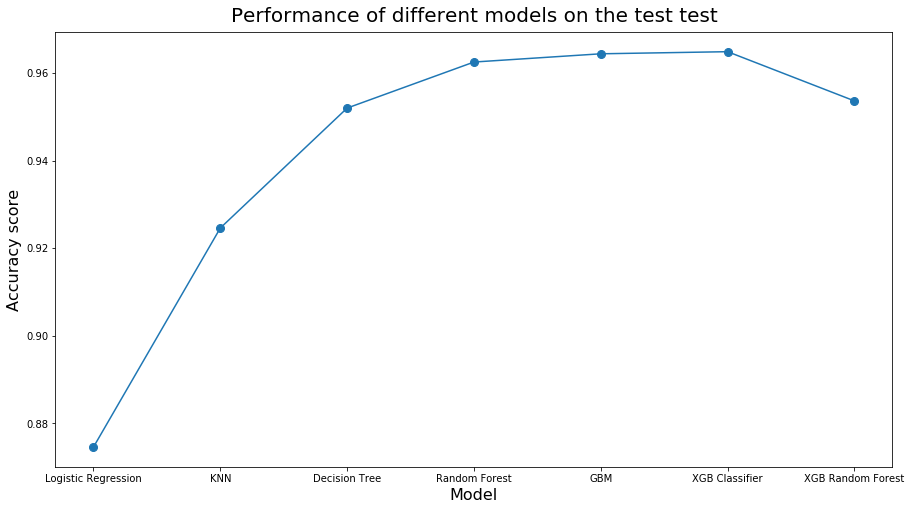

In [56]:
plot('test')